In [1]:
    class color:
       PURPLE = '\033[95m'
       CYAN = '\033[96m'
       DARKCYAN = '\033[36m'
       BLUE = '\033[94m'
       GREEN = '\033[92m'
       YELLOW = '\033[93m'
       RED = '\033[91m'
       BOLD = '\033[1m'
       UNDERLINE = '\033[4m'
       END = '\033[0m'


In [2]:

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


In [3]:
np.random.seed(42)

<h1> Data Report </h1>

<h2>Acquire data</h2>

In [4]:
print(color.BOLD+color.PURPLE+'Preview of the sample data :')
#Reading train and test data 

Train=pd.read_csv('Titanic_Train.csv')
Train.head()

Preview of the sample data :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(color.BOLD+color.PURPLE+'Preview of the sample data :')
#Reading train and test data 

Test=pd.read_csv('Titanic_Test.csv')
Test.tail()

Preview of the sample data :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
print(color.BOLD+color.PURPLE+'Dataset has',Train.shape[0],'rows and',Train.shape[1],'columns.')

Dataset has 891 rows and 12 columns.


In [7]:
print(color.BOLD+color.PURPLE+'Dataset has',Test.shape[0],'rows and',Test.shape[1],'columns.')

Dataset has 418 rows and 11 columns.


<h2> Data Inspection </h2>

In [8]:
frames = [Train, Test]
df1=pd.concat(frames)
df1.head()
print(color.BOLD+color.PURPLE+'Dataset has',df1.shape[0],'rows and',df1.shape[1],'columns.')

Dataset has 1309 rows and 12 columns.


In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
cat=[]
num=[]
for column in df1.columns:
    if df1[column].dtype == 'object':
        cat.append(column)
    else:
        num.append(column)

print(color.BOLD+color.PURPLE+'Categorical features in DataSet',cat)
print("\n")
print(color.BOLD+color.PURPLE+'Numberical features in DataSet',num)

Categorical features in DataSet ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numberical features in DataSet ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [13]:
Train.drop('PassengerId',axis=1,inplace=True)
Test.drop('PassengerId',axis=1,inplace=True)

In [14]:
#Reading unique values in non-numeric columns
print(color.BOLD+color.PURPLE+"Unique values in categorical features of dataset :\n")
for column in df1:
    if df1[column].dtype==object:
        print(color.BOLD+color.DARKCYAN,df1[column].value_counts().sort_values())
        print('\n')

Unique values in categorical features of dataset :

 Mangan, Miss. Mary                         1
Myhrman, Mr. Pehr Fabian Oliver Malkolm    1
Pain, Dr. Alfred                           1
Smith, Mr. Lucien Philip                   1
Rosblom, Mr. Viktor Richard                1
                                          ..
Chibnall, Mrs. (Edith Martha Bowerman)     1
Daher, Mr. Shedid                          1
Harknett, Miss. Alice Phoebe               1
Connolly, Miss. Kate                       2
Kelly, Mr. James                           2
Name: Name, Length: 1307, dtype: int64


 female    466
male      843
Name: Sex, dtype: int64


 C.A. 18723     1
349253         1
347464         1
C.A. 49867     1
6563           1
              ..
347082         7
PC 17608       7
CA 2144        8
1601           8
CA. 2343      11
Name: Ticket, Length: 929, dtype: int64


 D49                1
C39                1
B50                1
E77                1
A14                1
                  ..

In [15]:
def null_table(data):
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame


In [16]:
print(color.BOLD+color.PURPLE+"Missing values in dataset :\n")


Missing values in dataset :



In [17]:
null_frame_train = null_table(df1)
null_frame_train=null_frame_train[null_frame_train['Approximate Percentage of Null Values'] >0]
null_frame_train.sort_values(by='Approximate Percentage of Null Values',ascending=False)


,Columns,Count of Null Values,Approximate Percentage of Null Values
10,Cabin,1014,77.463713
1,Survived,418,31.932773
5,Age,263,20.091673
11,Embarked,2,0.152788
9,Fare,1,0.076394


In [18]:
print(color.BOLD+color.PURPLE+"Duplicate check on dataset :\n")
duplicateRowsDF = df1[df1.duplicated()]
duplicateRowsDF.sum()

Duplicate check on dataset :



PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [19]:
list_of_numerics=Train.select_dtypes(include=['float','int32']).columns
types= Train.dtypes
overview= Train.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= Train.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,11
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,116
Cabin,object,0


In [20]:
list_of_numerics=Train.select_dtypes(include=['float','int32']).columns
types= Test.dtypes
overview= Test.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= Test.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,2
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,55
Cabin,object,0
Embarked,object,0


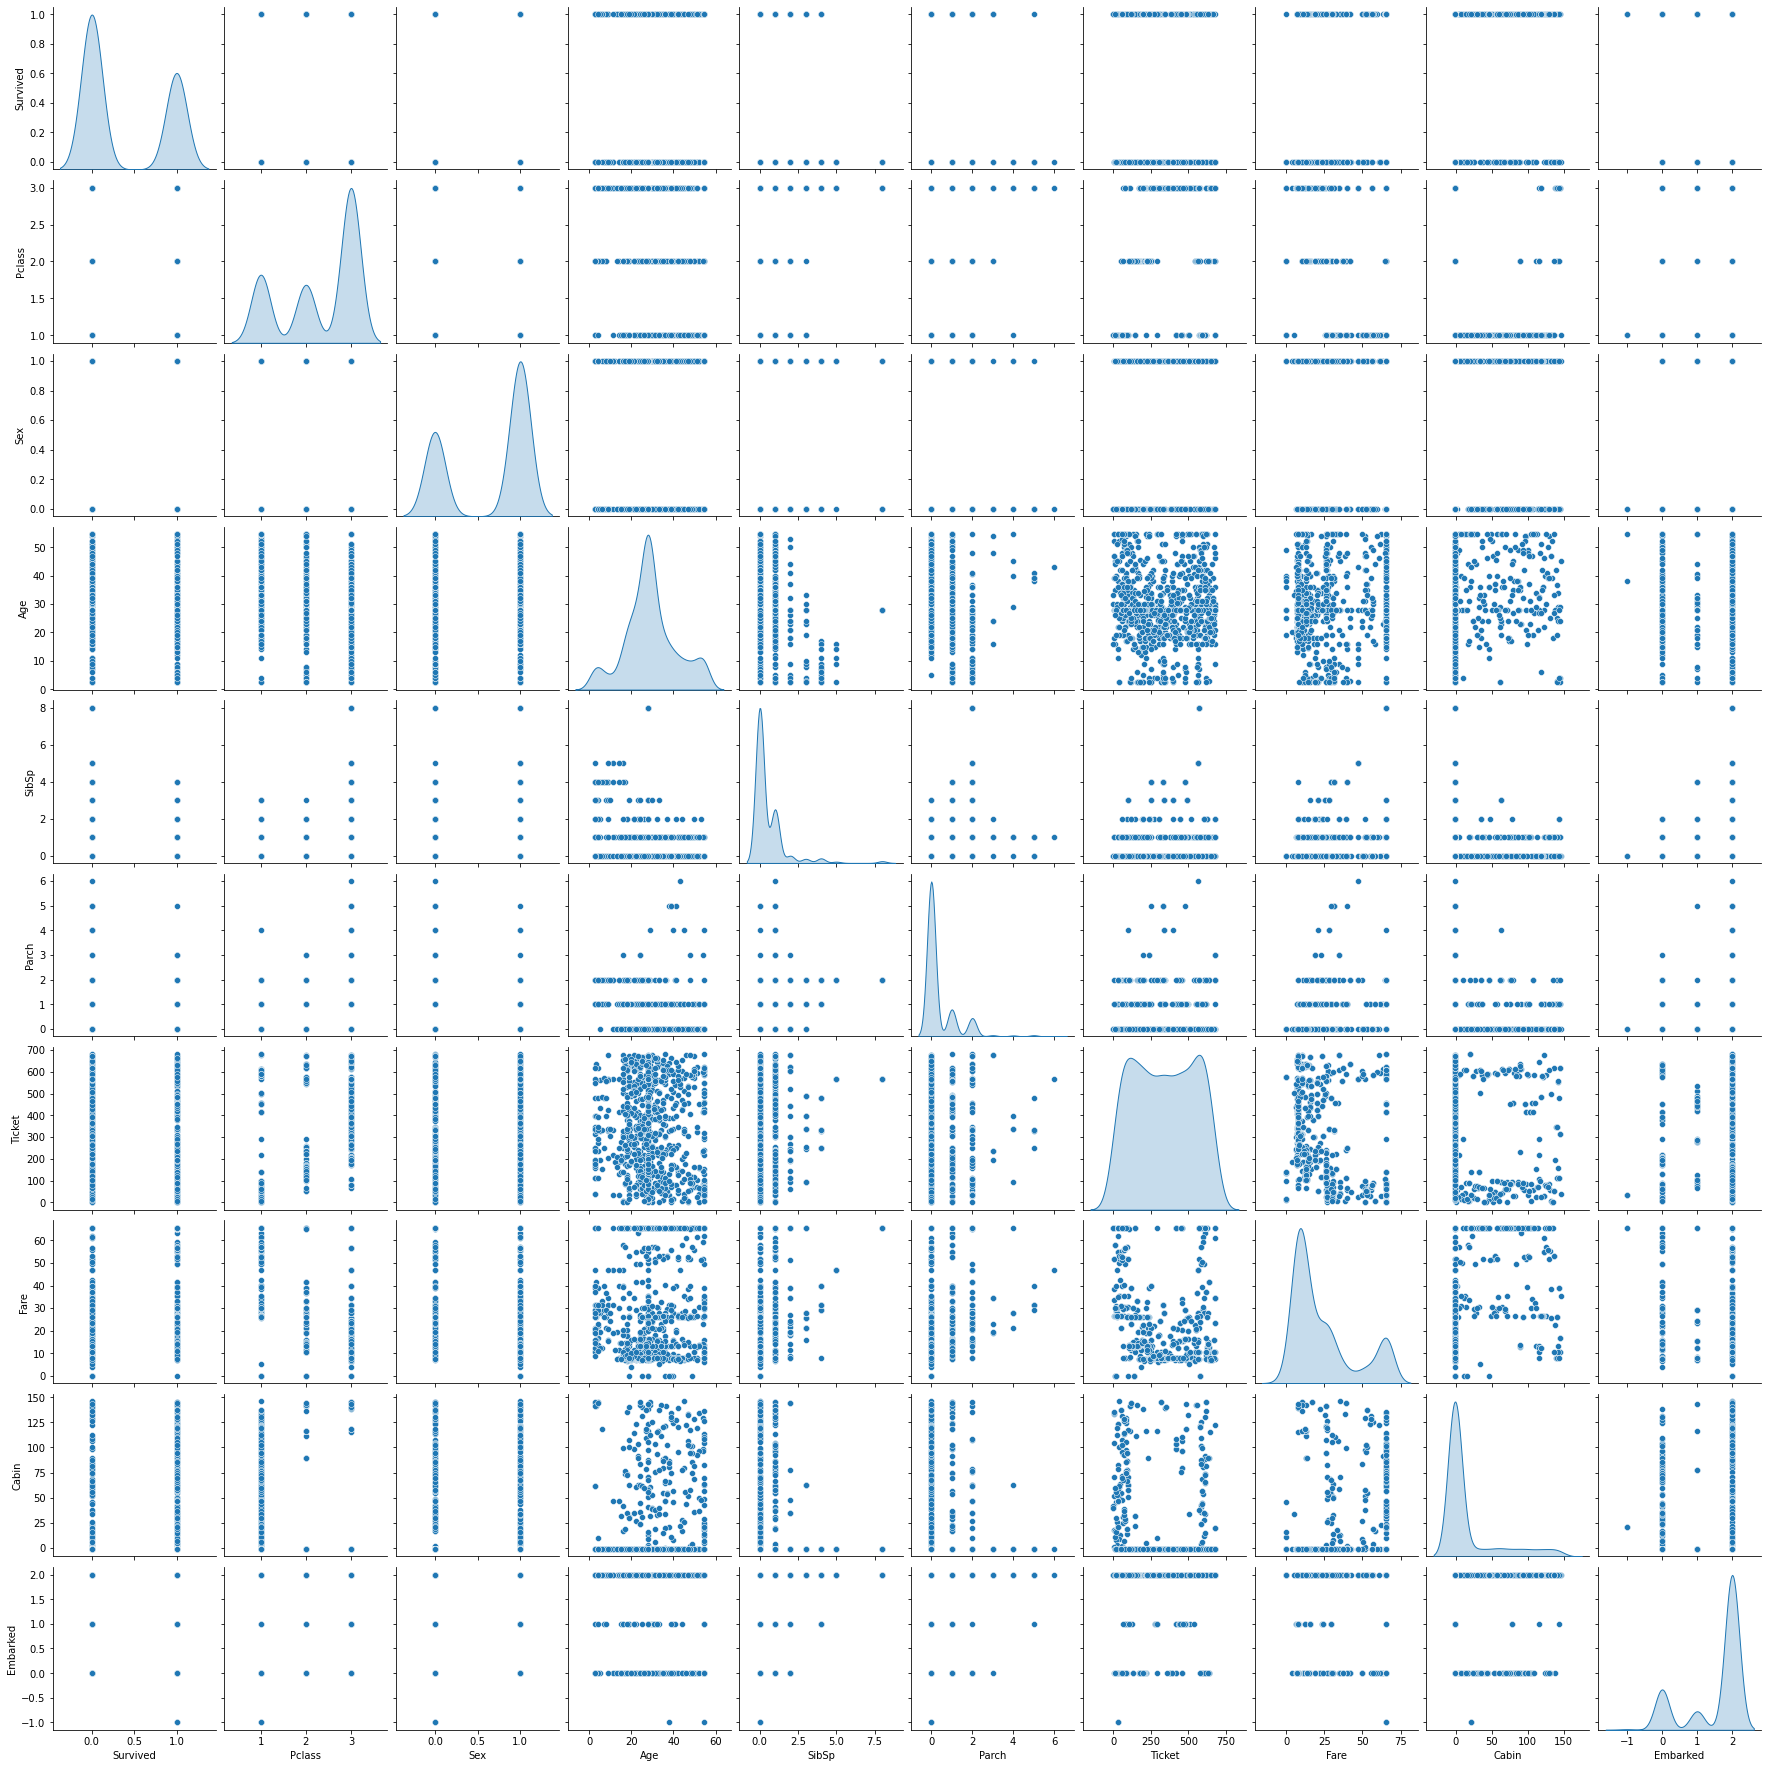

In [73]:
sns.pairplot(Train,diag_kind="kde")
plt.show()

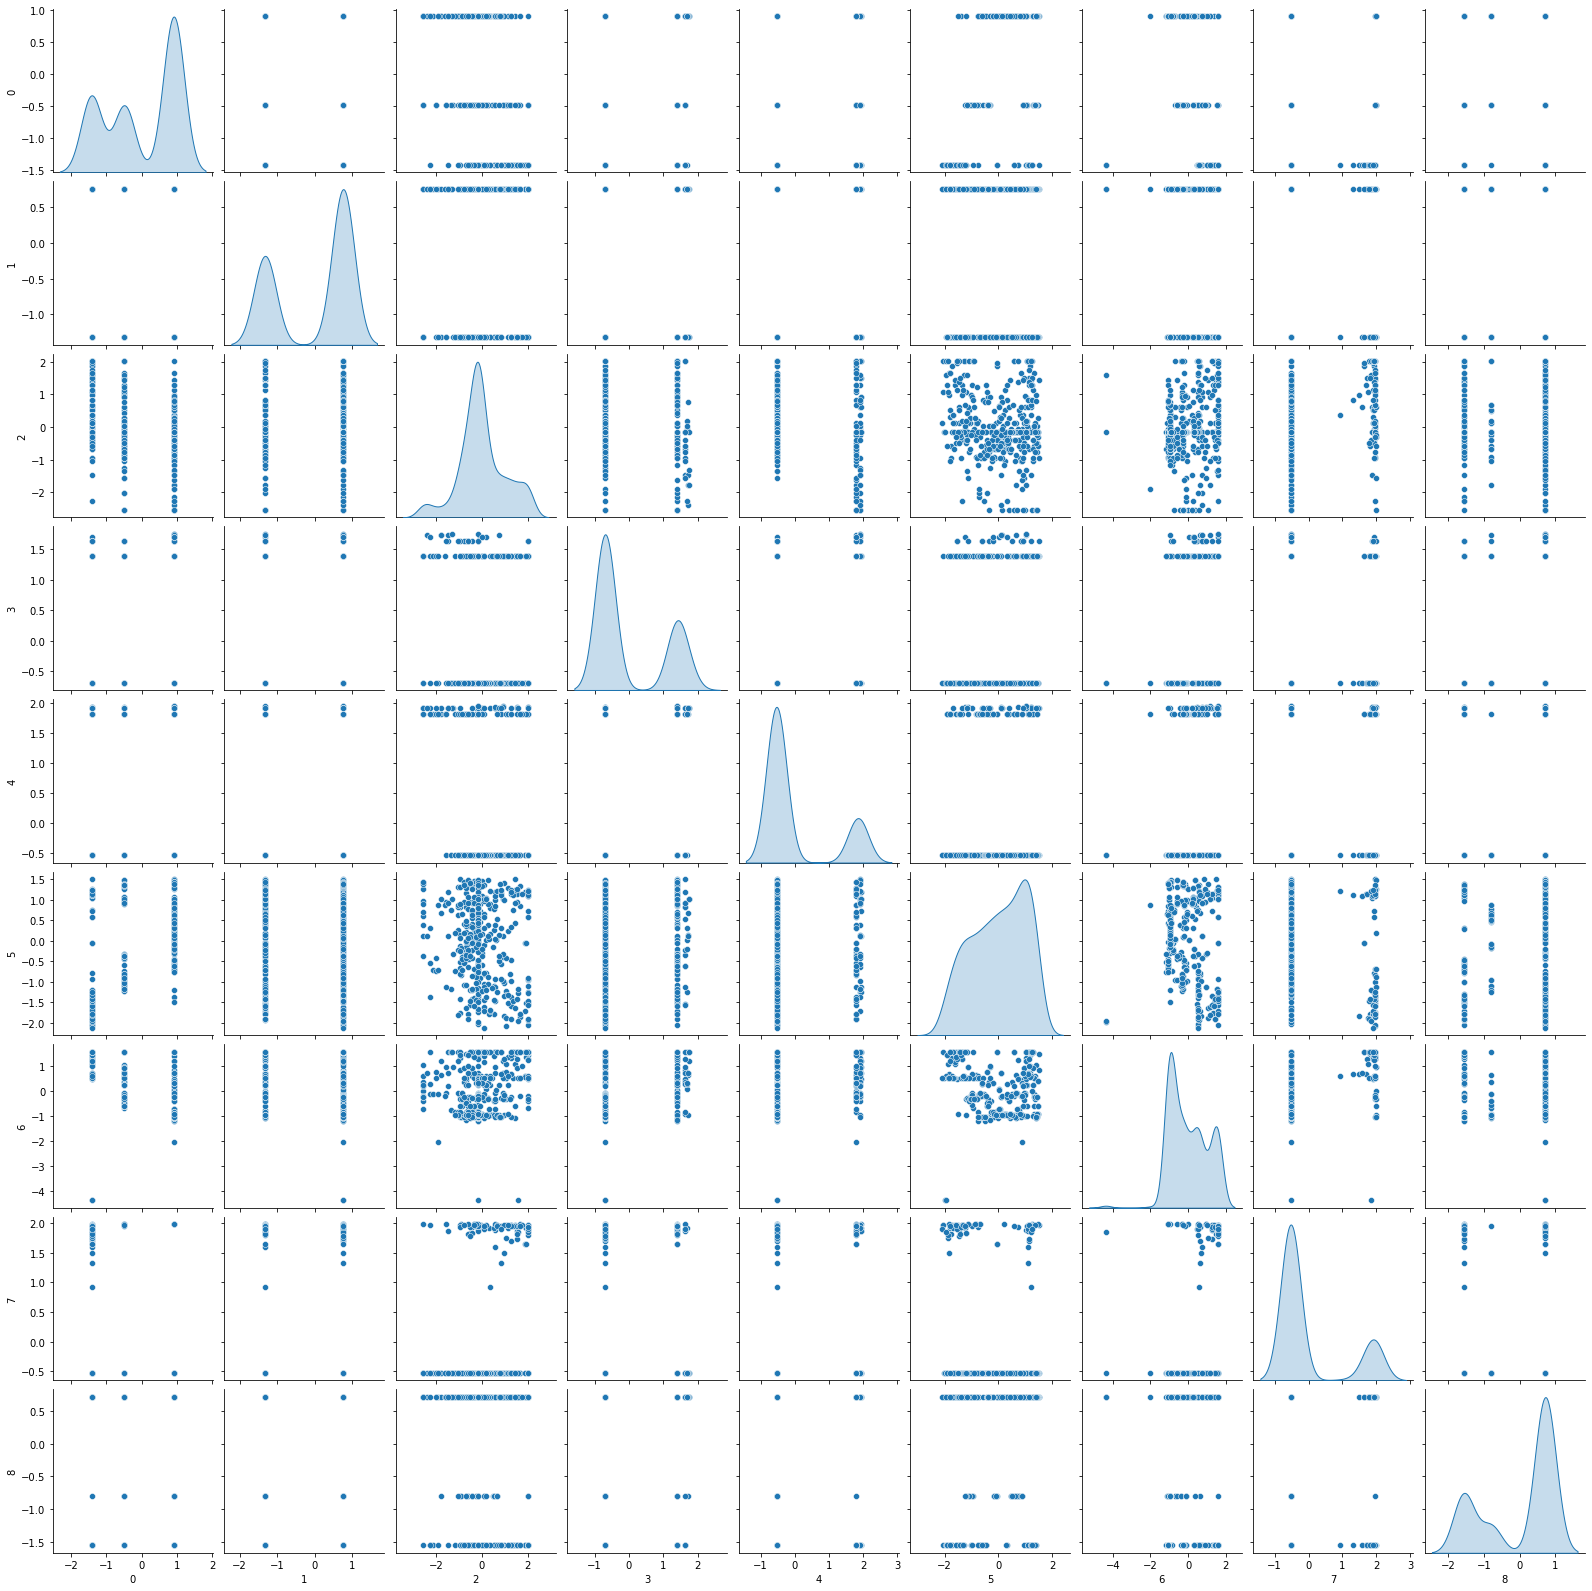

In [74]:
sns.pairplot(Test,diag_kind="kde")
plt.show()

In [23]:
print(color.BOLD+color.DARKCYAN,Train.Survived.value_counts())
print('%1s',7721/(7721+3827))
print('%0s',3827/(7721+3827))

 0    549
1    342
Name: Survived, dtype: int64
%1s 0.668600623484586
%0s 0.3313993765154139


<h3> Train Test Split </h3>

In [24]:
Train.drop('Name',axis=1,inplace=True)
Test.drop('Name',axis=1,inplace=True)

In [25]:
for feature in Train.columns: 
        if Train[feature].dtype == 'object': 
            print('\n')
            print(color.BOLD+color.DARKCYAN+'Feature:',feature)
            print(color.BOLD+color.DARKCYAN,pd.Categorical(Train[feature].unique()))
            print(color.BOLD+color.DARKCYAN,pd.Categorical(Train[feature].unique()).codes)
            Train[feature] = pd.Categorical(Train[feature]).codes



Feature: Sex
 ['male', 'female']
Categories (2, object): ['female', 'male']
 [1 0]


Feature: Ticket
 ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', ..., 'SOTON/OQ 392076', '211536', '112053', '111369', '370376']
Length: 681
Categories (681, object): ['110152', '110413', '110465', '110564', ..., 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208', 'WE/P 5735']
 [523 596 669  49 472 275  85 395 344 132 616  38 535 333 413 153 480 151
 301 184 139 152 278  42 329 179  95 283 362 598 586 288 549 600  43 202
 514 302 186 507  53 391 634 282 617 462  76 190 377 249 522 587 239  29
  94 555 215 561 566 197  32 457 337 601 189 553 623 248 270 557 621 204
  80 347 355 473 158 432 304 311 280  25 637 247 676 652 297 298 341 678
 548 428 475 607 612 117 150 384 361 417 505 245 354 296 254 388 469   2
 193 274 491 176 666 460 585 540 219 463 541 196 318 380 640 537 111 552
 630  55 504 592 203 332 668 438 118 558 405 113 147 622  36 516 538 573
 595 418 654 258 568 470 559 323 265 423  

In [26]:
for feature in Test.columns: 
        if Test[feature].dtype == 'object': 
            print('\n')
            print(color.BOLD+color.DARKCYAN+'Feature:',feature)
            print(color.BOLD+color.DARKCYAN,pd.Categorical(Test[feature].unique()))
            print(color.BOLD+color.DARKCYAN,pd.Categorical(Test[feature].unique()).codes)
            Test[feature] = pd.Categorical(Test[feature]).codes



Feature: Sex
 ['male', 'female']
Categories (2, object): ['female', 'male']
 [1 0]


Feature: Ticket
 ['330911', '363272', '240276', '315154', '3101298', ..., 'A.5. 3236', 'PC 17758', 'SOTON/O.Q. 3101262', '359309', '2668']
Length: 363
Categories (363, object): ['110469', '110489', '110813', '111163', ..., 'W./C. 14266', 'W./C. 6607', 'W./C. 6608', 'W.E.P. 5734']
 [152 221  73 147 138 261 158  84 100 269 195 259  52  74 362 343  60 119
 356 120 316 277 314 313 319 273  14 121  11 104 338 283 280 360  34 115
 166 141 172  39 204  16 347  65  24 355 312 243  30 290  37 344 131  49
 335 249 198 191 253 199  64 185 159 300 155  22  89 250 194 137 306  13
 219  28  85 236 111 303  47 201  72 102 150 268 224 130 179 168 297 246
  38 209  46 354 190 266  29  57 227 178  92 278 153 252 163  83  68 156
 304 149 113 114 328  33 337 286 232 255 237 245 210 231  51 164 357  17
 256  90 196 216  99  81 353 294  18  78  43 171  41 336  20  88  26 203
 239 214 181 332 189   1 351 161  94  54 167  6

In [27]:
for column in Train.columns:
    if Train[column].dtype != 'object':
        Train[column].fillna(Train[column].median(),inplace=True)

In [28]:
for column in Test.columns:
    if Test[column].dtype != 'object':
        Test[column].fillna(Test[column].median(),inplace=True)

In [29]:
for column in Train.columns:
    if Train[column].dtype == 'object':
        Train[column].fillna(Train[column].mode(),inplace=True)

In [30]:
for column in Test.columns:
    if Test[column].dtype == 'object':
        Test[column].fillna(Test[column].mode(),inplace=True)

In [31]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    int16  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    int8   
 8   Embarked  418 non-null    int8   
dtypes: float64(2), int16(1), int64(3), int8(3)
memory usage: 18.5 KB


In [32]:
# Copy all the predictor variables into X dataframe
X_train = Train.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y_train = Train['Survived']

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int16  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int16  
 8   Embarked  891 non-null    int8   
dtypes: float64(2), int16(2), int64(3), int8(2)
memory usage: 40.2 KB


In [34]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    int16  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    int8   
 8   Embarked  418 non-null    int8   
dtypes: float64(2), int16(1), int64(3), int8(3)
memory usage: 18.5 KB


In [35]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',Test.shape)


Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (891, 9)
Number of rows and columns of the training set for the dependent variable: (891,)
Number of rows and columns of the test set for the independent variables: (418, 9)


In [36]:
# build the lightgbm model
import lightgbm as lgb
#best_grid_dt = lgb.LGBMClassifier()

from catboost import CatBoostClassifier
best_grid_dt = AdaBoostClassifier()




In [37]:
print(color.BOLD+color.DARKCYAN+'Parameter used to build Cart model:')
best_grid_dt.fit(X_train, y_train)

Parameter used to build Cart model:


AdaBoostClassifier()

In [38]:
ytrain_predict = best_grid_dt.predict(X_train)
ytest_predict = best_grid_dt.predict(Test)

In [39]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
ytest_predict
ytest_predict_prob=best_grid_dt.predict_proba(Test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.507101,0.492899
1,0.500888,0.499112
2,0.497886,0.502114
3,0.511481,0.488519
4,0.497103,0.502897


In [40]:
acc_decision_tree = round(best_grid_dt.score(X_train, y_train) * 100, 2)
acc_decision_tree

86.31

In [41]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)

df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Train Precision',rf_train_precision)
print (color.BOLD+color.DARKCYAN+'RF Train Recall',rf_train_recall)
print (color.BOLD+color.DARKCYAN+'RF Train F1 score ',rf_train_f1)

Random Forest Train data metrices:

RF Train Precision 0.84
RF Train Recall 0.8
RF Train F1 score  0.82


CART WITH OUTLIER REMOVED

In [42]:
def cap_data(df):
    for col in df.columns:
        
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int32')):
    
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lr = Q1-1.5*IQR
            ur = Q3+1.5*IQR
            df[col]=np.where(df[col]>ur,ur,df[col])
            df[col]=np.where(df[col]<lr,lr,df[col])

        else:
            df[col]=df[col]
    return df
final_df=cap_data(Train)
final_df=cap_data(Test)
print(color.BOLD+color.PURPLE+'Function implemented to treat outliers.')


Function implemented to treat outliers.


In [43]:
list_of_numerics=Train.select_dtypes(include=['float','int32']).columns
types= Test.dtypes
overview= Test.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= Test.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
Pclass,int64,0
Sex,int8,0
Age,float64,0
SibSp,int64,0
Parch,int64,0
Ticket,int16,0
Fare,float64,0
Cabin,int8,0
Embarked,int8,0


In [44]:
# Copy all the predictor variables into X dataframe
X_train_wo = Train.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y_train_wo = Train['Survived']

In [45]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train_wo.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train_wo.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',Test.shape)


Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (891, 9)
Number of rows and columns of the training set for the dependent variable: (891,)
Number of rows and columns of the test set for the independent variables: (418, 9)


In [46]:

best_grid_dt_wo = AdaBoostClassifier()
best_grid_dt_wo.fit(X_train, y_train)


AdaBoostClassifier()

In [47]:
ytrain_predict_wo = best_grid_dt_wo.predict(X_train_wo)
ytest_predict_wo = best_grid_dt_wo.predict(Test)

In [48]:
rf_metrics=classification_report(y_train_wo, ytrain_predict_wo,output_dict=True)

df=pd.DataFrame(rf_metrics).transpose()
rf_train_precisionn_wo=round(df.loc["1"][0],2)
rf_train_recalln_wo=round(df.loc["1"][1],2)
rf_train_f1n_wo=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Train Precision',rf_train_precisionn_wo)
print (color.BOLD+color.DARKCYAN+'RF Train Recall',rf_train_recalln_wo)
print (color.BOLD+color.DARKCYAN+'RF Train F1 score ',rf_train_f1n_wo)

Random Forest Train data metrices:

RF Train Precision 0.82
RF Train Recall 0.77
RF Train F1 score  0.79


In [49]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
ytest_predict_wo
ytest_predict_prob_wo=best_grid_dt_wo.predict_proba(Test)
ytest_predict_prob_wo
pd.DataFrame(ytest_predict_prob_wo).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.507101,0.492899
1,0.500888,0.499112
2,0.506863,0.493137
3,0.511481,0.488519
4,0.497103,0.502897


In [50]:
acc_decision_tree_wo = round(best_grid_dt_wo.score(X_train_wo, y_train_wo) * 100, 2)
acc_decision_tree_wo

84.62

CART WITH SKEWNESS REMOVED

In [51]:
# Copy all the predictor variables into X dataframe
X_train_wos = Train.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y_train_wos = Train['Survived']

In [52]:
X_train_wos.skew(axis = 0)

Pclass     -0.630548
Sex        -0.618921
Age         0.164436
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        1.082179
Cabin       2.099238
Embarked   -1.270634
dtype: float64

In [53]:
Test.skew(axis = 0)

Pclass     -0.534170
Sex        -0.568991
Age         0.453769
SibSp       4.168337
Parch       4.654462
Ticket     -0.013203
Fare        1.089267
Cabin       2.253245
Embarked   -0.873825
dtype: float64

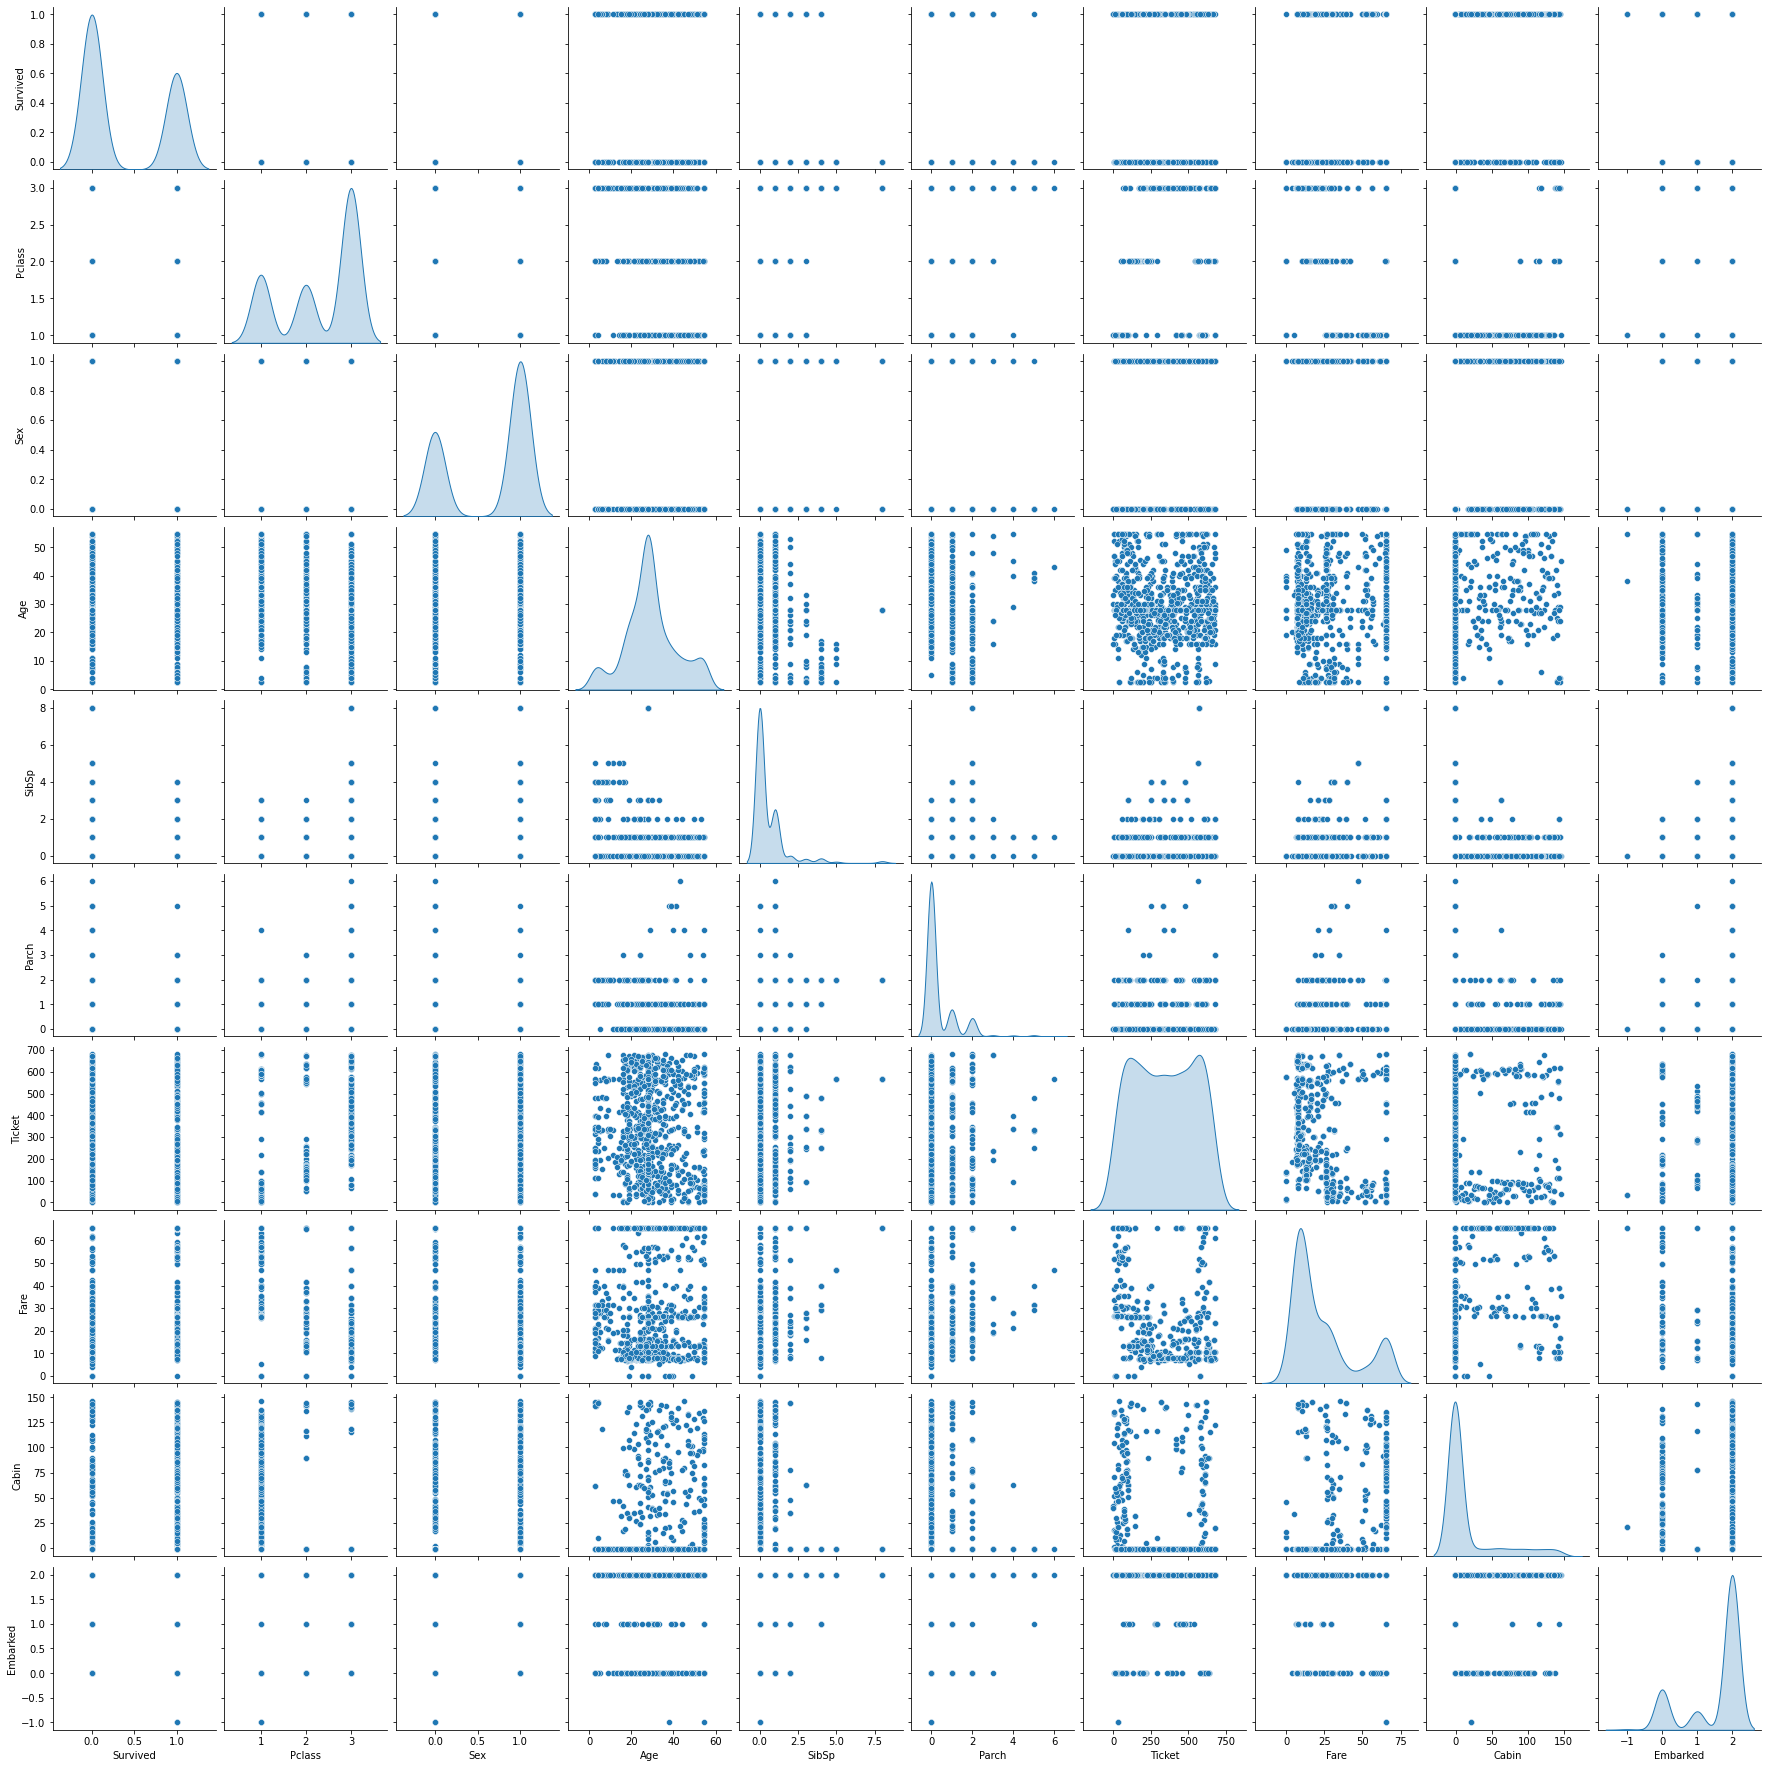

In [75]:
sns.pairplot(Train,diag_kind="kde")
plt.show()

In [54]:
from sklearn.preprocessing import power_transform
X_train_wos=pd.DataFrame(power_transform(X_train_wos))

In [55]:
from sklearn.preprocessing import power_transform
Test=pd.DataFrame(power_transform(Test))

In [56]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train_wos.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train_wos.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',Test.shape)


Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (891, 9)
Number of rows and columns of the training set for the dependent variable: (891,)
Number of rows and columns of the test set for the independent variables: (418, 9)


In [57]:

best_grid_dt_wos = AdaBoostClassifier()
best_grid_dt_wos.fit(X_train, y_train)


AdaBoostClassifier()

In [58]:
ytrain_predict_wos = best_grid_dt_wos.predict(X_train_wos)
ytest_predict_wos = best_grid_dt_wos.predict(Test)

In [59]:
rf_metrics=classification_report(y_train_wos, ytrain_predict_wos,output_dict=True)

df=pd.DataFrame(rf_metrics).transpose()
rf_train_precisionn_wos=round(df.loc["1"][0],2)
rf_train_recalln_wos=round(df.loc["1"][1],2)
rf_train_f1n_wos=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Train Precision',rf_train_precisionn_wos)
print (color.BOLD+color.DARKCYAN+'RF Train Recall',rf_train_recalln_wos)
print (color.BOLD+color.DARKCYAN+'RF Train F1 score ',rf_train_f1n_wos)

Random Forest Train data metrices:

RF Train Precision 0.4
RF Train Recall 0.96
RF Train F1 score  0.56


In [60]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
ytest_predict_wos
ytest_predict_prob_wos=best_grid_dt_wos.predict_proba(Test)
ytest_predict_prob_wos
pd.DataFrame(ytest_predict_prob_wos).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.485313,0.514687
1,0.470962,0.529038
2,0.500117,0.499883
3,0.485313,0.514687
4,0.470962,0.529038


In [61]:
acc_decision_tree_wos = round(best_grid_dt_wos.score(X_train_wos, y_train_wos) * 100, 2)
acc_decision_tree_wos

42.54

CART WITH balanced

In [62]:
print(color.BOLD+color.DARKCYAN,Train.Survived.value_counts())
print('%1s',7721/(7721+3827))
print('%0s',3827/(7721+3827))

 0    549
1    342
Name: Survived, dtype: int64
%1s 0.668600623484586
%0s 0.3313993765154139


In [63]:
# Copy all the predictor variables into X dataframe
X_train_wos = Train.drop('Survived', axis=1)

# Copy target into the y dataframe. 
y_train_wos = Train['Survived']

In [64]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train_wos.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train_wos.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',Test.shape)


Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (891, 9)
Number of rows and columns of the training set for the dependent variable: (891,)
Number of rows and columns of the test set for the independent variables: (418, 9)


In [65]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_wos, y_train_wos.ravel())

In [66]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (1098, 9)
After OverSampling, the shape of train_y: (1098,) 

After OverSampling, counts of label '1': 549
After OverSampling, counts of label '0': 549


In [67]:


best_grid_dt_wob = AdaBoostClassifier()
print(color.BOLD+color.DARKCYAN+'Parameter used to build Cart model:')
best_grid_dt_wob.fit(X_train, y_train)



Parameter used to build Cart model:


AdaBoostClassifier()

In [68]:
ytrain_predict_wob = best_grid_dt_wob.predict(X_train_res)
ytest_predict_wob = best_grid_dt_wob.predict(Test)

In [69]:
rf_metrics=classification_report(y_train_res, ytrain_predict_wob,output_dict=True)

df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision_wob=round(df.loc["1"][0],2)
rf_train_recall_wob=round(df.loc["1"][1],2)
rf_train_f1_wob=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Train Precision',rf_train_precision_wob)
print (color.BOLD+color.DARKCYAN+'RF Train Recall',rf_train_recall_wob)
print (color.BOLD+color.DARKCYAN+'RF Train F1 score ',rf_train_f1_wob)

Random Forest Train data metrices:

RF Train Precision 0.88
RF Train Recall 0.82
RF Train F1 score  0.85


In [70]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
ytest_predict_wob
ytest_predict_prob_wob=best_grid_dt_wob.predict_proba(Test)
ytest_predict_prob_wob
pd.DataFrame(ytest_predict_prob_wob).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.485313,0.514687
1,0.470962,0.529038
2,0.500117,0.499883
3,0.485313,0.514687
4,0.470962,0.529038


In [71]:
acc_decision_tree_wob = round(best_grid_dt_wob.score(X_train_res, y_train_res) * 100, 2)
acc_decision_tree_wob

85.34

In [72]:

index=['Accuracy',  'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'CART ':[acc_decision_tree,rf_train_recall,rf_train_precision,rf_train_f1],
        'CART WO':[acc_decision_tree_wo,rf_train_recalln_wo,rf_train_precisionn_wo,rf_train_f1n_wo],
'CART WOS':[acc_decision_tree_wos,rf_train_recalln_wos,rf_train_precisionn_wos,rf_train_f1n_wos],
'CART WOB':[acc_decision_tree_wob,rf_train_recall_wob,rf_train_precision_wob,rf_train_f1_wob]},index=index)
round(data,2)

,CART,CART WO,CART WOS,CART WOB
Accuracy,86.31,84.62,42.54,85.34
Recall,0.80,0.77,0.96,0.82
Precision,0.84,0.82,0.40,0.88
F1 Score,0.82,0.79,0.56,0.85
